# Assignment 3

In [23]:
# importing necessary packages
import pandas as pd
import tarfile
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay


## Problem 1: Spam and Ham data

In [24]:
def read_data(fn):
    dataset = list()
    with tarfile.open(fn) as tf:
        for i in tf:
            if i.isfile():
                with tf.extractfile(i) as f:
                    b  = f.read()
                    if b'charset=utf-8' in b or b'charset=UTF-8' in b:
                        s = b.decode('utf-8')
                    else:
                        s = b.decode('iso-8859-1')
                    dataset.append(s)
    return dataset

In [25]:
data = {
    'easy_ham': read_data('data/20021010_easy_ham.tar.bz2'),
    'hard_ham': read_data('data/20021010_hard_ham.tar.bz2'),
    'spam': read_data('data/20021010_spam.tar.bz2')
}

In [26]:
df_eh = pd.DataFrame(data['easy_ham']) 
df_hh = pd.DataFrame(data['hard_ham'])
df_spam = pd.DataFrame(data['spam'])

In [27]:
df_eh.rename(columns={0: 'email'}, inplace=True)
df_hh.rename(columns={0: 'email'}, inplace=True)
df_spam.rename(columns={0: 'email'}, inplace=True)

df_eh['label'] = 'easy_ham'
df_hh['label'] = 'hard_ham'
df_spam['label'] = 'spam'

In [28]:
df_spam

,email,label
0,From george@vccomputers.ie Mon Aug 26 17:49:4...,spam
1,From gwfqjulie@msn.com Mon Aug 26 21:37:20 20...,spam
2,From simply-amateur-zzzz=example.com@free4porn...,spam
3,From thisisagreatfreepornmovie@framesetup.com ...,spam
4,From safety33o@l4.newnamedns.com Tue Aug 27 0...,spam
...,...,...
496,From havoc1006@yahoo.com Mon Aug 26 15:49:43 ...,spam
497,From mando@insiq.us Mon Aug 26 15:49:52 2002\...,spam
498,From girl_with_toys_541652k57@yahoo.com Mon A...,spam
499,From guyhaibo@yahoo.ca Mon Aug 26 15:50:05 20...,spam


In [29]:
df_eh.to_csv("eh_content.csv")
df_hh.to_csv("hh_content.csv")
df_spam.to_csv("spam_content.csv")

B. Data Splitting

In [30]:
# Train-test split for df_spam
X_train_spam, X_test_spam, y_train_spam, y_test_spam = train_test_split(df_spam['email'], df_spam['label'], test_size=0.2, random_state=42)

# Train-test split for df_eh
X_train_eh, X_test_eh, y_train_eh, y_test_eh = train_test_split(df_eh['email'], df_eh['label'], test_size=0.2, random_state=42)

# Train-test split for df_hh
X_train_hh, X_test_hh, y_train_hh, y_test_hh = train_test_split(df_hh['email'], df_hh['label'], test_size=0.2, random_state=42)

In [31]:


count_eh = CountVectorizer()
count_hh = CountVectorizer()

# Concatenating the spam training data with the two different ham datas
X_train_eh_spam = pd.concat([X_train_spam, X_train_eh],ignore_index=True)
X_train_hh_spam = pd.concat([X_train_spam, X_train_hh],ignore_index=True)

y_train_eh_spam = pd.concat([y_train_spam, y_train_eh],ignore_index=True)
y_train_hh_spam = pd.concat([y_train_spam, y_train_hh],ignore_index=True)

# Transforming the concatenated training data into a document-term matrix 
# and fits the count vectorizer to the training data
X_train_eh_spam = count_eh.fit_transform(X_train_eh_spam)
X_train_hh_spam = count_hh.fit_transform(X_train_hh_spam)

# Apply the same transformation on the test data
X_test_eh_spam = pd.concat([X_test_spam, X_test_eh],ignore_index=True)
X_test_hh_spam = pd.concat([X_test_spam, X_test_hh],ignore_index=True)

y_test_eh_spam = pd.concat([y_test_spam, y_test_eh],ignore_index=True)
y_test_hh_spam = pd.concat([y_test_spam, y_test_hh],ignore_index=True)

# Transforming the concatenated test data using the parameters learned from our training data
X_test_eh_spam = count_eh.transform(X_test_eh_spam)
X_test_hh_spam = count_hh.transform(X_test_hh_spam)

Problem 3

In [32]:
# Instantiate classifiers
multinomial_nb = MultinomialNB()
bernoulli_nb = BernoulliNB()

In [33]:
# Train the classifiers on the training data
multinomial_nb.fit(X_train_eh_spam, y_train_eh_spam)
bernoulli_nb.fit(X_train_eh_spam, y_train_eh_spam)

# Make predictions on the test set
multinomial_nb_preds = multinomial_nb.predict(X_test_eh_spam)
bernoulli_nb_preds = bernoulli_nb.predict(X_test_eh_spam)

In [34]:
# Calculate accuracy, precision and recall for Multinomial Naive Bayes Classifier 
multinomial_accuracy = accuracy_score(y_test_eh_spam, multinomial_nb_preds)
multinomial_precision = precision_score(y_test_eh_spam, multinomial_nb_preds, pos_label='spam')
multinomial_recall = recall_score(y_test_eh_spam, multinomial_nb_preds, pos_label='spam')

# Calculate confusion matrix for Multinomial Naive Bayes Classifier
multinomial_conf_matrix = confusion_matrix(y_test_eh_spam, multinomial_nb_preds)

# Calculate accuracy, precision and recall for Bernoulli Naive Bayes Classifier
bernoulli_accuracy = accuracy_score(y_test_eh_spam, bernoulli_nb_preds)
bernoulli_precision = precision_score(y_test_eh_spam, bernoulli_nb_preds, pos_label='spam')
bernoulli_recall = recall_score(y_test_eh_spam, bernoulli_nb_preds, pos_label='spam')

# Calculate confusion matrix for Bernoulli Naive Bayes Classifier
bernoulli_conf_matrix = confusion_matrix(y_test_eh_spam, bernoulli_nb_preds)


In [35]:
# Print Multinomial Naive Bayes Classifier results
print("Multinomial Naive Bayes Classifier Accuracy:", multinomial_accuracy)
print("Multinomial Naive Bayes Classifier Precision:", multinomial_precision)
print("Multinomial Naive Bayes Classifier Recall:", multinomial_recall)
print("Multinomial Naive Bayes Classifier Confusion Matrix:")
print(multinomial_conf_matrix)

# Print Bernoulli Naive Bayes Classifier results
print("Bernoulli Naive Bayes Classifier Accuracy:", bernoulli_accuracy)
print("Bernoulli Naive Bayes Classifier Precision:", bernoulli_precision)
print("Bernoulli Naive Bayes Classifier Recall:", bernoulli_recall)
print("Bernoulli Naive Bayes Classifier Confusion Matrix:")
print(bernoulli_conf_matrix)


Multinomial Naive Bayes Classifier Accuracy: 0.9624183006535948
Multinomial Naive Bayes Classifier Precision: 0.9875
Multinomial Naive Bayes Classifier Recall: 0.7821782178217822
Multinomial Naive Bayes Classifier Confusion Matrix:
[[510   1]
 [ 22  79]]
Bernoulli Naive Bayes Classifier Accuracy: 0.9019607843137255
Bernoulli Naive Bayes Classifier Precision: 0.9767441860465116
Bernoulli Naive Bayes Classifier Recall: 0.4158415841584158
Bernoulli Naive Bayes Classifier Confusion Matrix:
[[510   1]
 [ 59  42]]


In [36]:
# Set font to match Latex
plt.rcParams.update({
    "text.usetex": False,
    "font.family": "serif",
})

In [37]:
# Create tabular representation of performance metrics for the classifiers on Easy Ham
eh_data = {
    'Accuracy': [multinomial_accuracy, bernoulli_accuracy], 
    'Precision': [multinomial_precision, bernoulli_precision],
    'Recall': [multinomial_recall, bernoulli_recall] 
    }

eh_df = pd.DataFrame(eh_data, index=['Multinomial Naive Bayes', 'Bernoulli Naive Bayes'])

latex_table_eh = eh_df.to_latex()

# Save LaTeX code to a .tex file
with open('classifier_performance_eh.tex', 'w') as f:
    f.write(latex_table_eh)

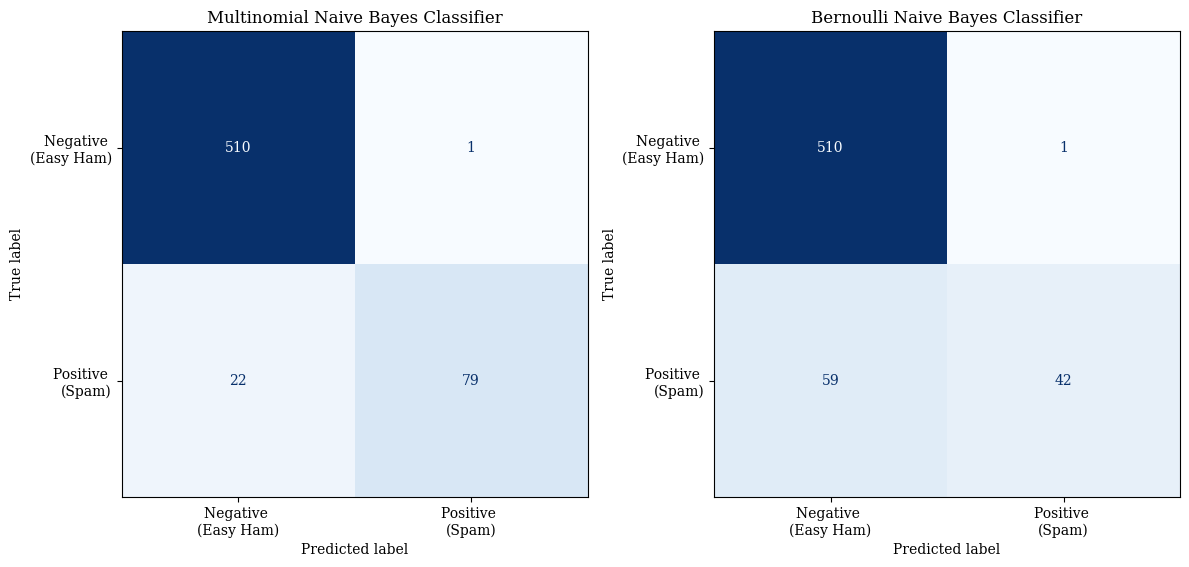

In [38]:


# Create a figure and axes for subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot confusion matrix for Multinomial Naive Bayes Classifier
multinomial_cf = ConfusionMatrixDisplay(multinomial_conf_matrix, display_labels=('Negative \n(Easy Ham)','Positive \n(Spam)')).plot(ax=axes[0], cmap="Blues", colorbar=False)
axes[0].set_title("Multinomial Naive Bayes Classifier")

# Plot confusion matrix for Bernoulli Naive Bayes Classifier
bernoulli_cf = ConfusionMatrixDisplay(bernoulli_conf_matrix, display_labels=('Negative \n(Easy Ham)','Positive \n(Spam)')).plot(ax=axes[1], cmap="Blues", colorbar=False)
axes[1].set_title("Bernoulli Naive Bayes Classifier")

# Adjust layout
plt.tight_layout()

# Save the plot as PDF
plt.savefig("confusion_matrices_eh.pdf")
plt.show()

In [39]:
# Instantiate classifiers
multinomial_nb_hh = MultinomialNB()
bernoulli_nb_hh = BernoulliNB()

In [40]:
# Train the classifiers on the training data
multinomial_nb_hh.fit(X_train_hh_spam, y_train_hh_spam)
bernoulli_nb_hh.fit(X_train_hh_spam, y_train_hh_spam)

# Make predictions on the test set
multinomial_nb_preds_hh = multinomial_nb_hh.predict(X_test_hh_spam)
bernoulli_nb_preds_hh = bernoulli_nb_hh.predict(X_test_hh_spam)

In [41]:
# Calculate accuracy, precision and recall for Multinomial Naive Bayes Classifier 
multinomial_accuracy_hh = accuracy_score(y_test_hh_spam, multinomial_nb_preds_hh)
multinomial_precision_hh = precision_score(y_test_hh_spam, multinomial_nb_preds_hh, pos_label='spam')
multinomial_recall_hh = recall_score(y_test_hh_spam, multinomial_nb_preds_hh, pos_label='spam')

# Calculate confusion matrix for Multinomial Naive Bayes Classifier
multinomial_conf_matrix_hh = confusion_matrix(y_test_hh_spam, multinomial_nb_preds_hh)

# Calculate accuracy, precision and recall for Bernoulli Naive Bayes Classifier
bernoulli_accuracy_hh = accuracy_score(y_test_hh_spam, bernoulli_nb_preds_hh)
bernoulli_precision_hh = precision_score(y_test_hh_spam, bernoulli_nb_preds_hh, pos_label='spam')
bernoulli_recall_hh = recall_score(y_test_hh_spam, bernoulli_nb_preds_hh, pos_label='spam')

# Calculate confusion matrix for Bernoulli Naive Bayes Classifier
bernoulli_conf_matrix_hh = confusion_matrix(y_test_hh_spam, bernoulli_nb_preds_hh)


In [42]:

# Print Multinomial Naive Bayes Classifier results
print("Multinomial Naive Bayes Classifier Accuracy:", multinomial_accuracy_hh)
print("Multinomial Naive Bayes Classifier Precision:", multinomial_precision_hh)
print("Multinomial Naive Bayes Classifier Recall:", multinomial_recall_hh)
print("Multinomial Naive Bayes Classifier Confusion Matrix:")
print(multinomial_conf_matrix_hh)

# Print Bernoulli Naive Bayes Classifier results
print("Bernoulli Naive Bayes Classifier Accuracy:", bernoulli_accuracy_hh)
print("Bernoulli Naive Bayes Classifier Precision:", bernoulli_precision_hh)
print("Bernoulli Naive Bayes Classifier Recall:", bernoulli_recall_hh)
print("Bernoulli Naive Bayes Classifier Confusion Matrix:")
print(bernoulli_conf_matrix_hh)

Multinomial Naive Bayes Classifier Accuracy: 0.9735099337748344
Multinomial Naive Bayes Classifier Precision: 0.9619047619047619
Multinomial Naive Bayes Classifier Recall: 1.0
Multinomial Naive Bayes Classifier Confusion Matrix:
[[ 46   4]
 [  0 101]]
Bernoulli Naive Bayes Classifier Accuracy: 0.9006622516556292
Bernoulli Naive Bayes Classifier Precision: 0.8839285714285714
Bernoulli Naive Bayes Classifier Recall: 0.9801980198019802
Bernoulli Naive Bayes Classifier Confusion Matrix:
[[37 13]
 [ 2 99]]


In [43]:
hh_data = {
    'Accuracy': [multinomial_accuracy_hh, bernoulli_accuracy_hh], 
    'Precision': [multinomial_precision_hh, bernoulli_precision_hh],
    'Recall': [multinomial_recall_hh, bernoulli_recall_hh] 
    }

hh_df = pd.DataFrame(hh_data, index=['Multinomial Naive Bayes', 'Bernoulli Naive Bayes'])

latex_table = hh_df.to_latex()

# Save LaTeX code to a .tex file
with open('classifier_performance_hh.tex', 'w') as f:
    f.write(latex_table)

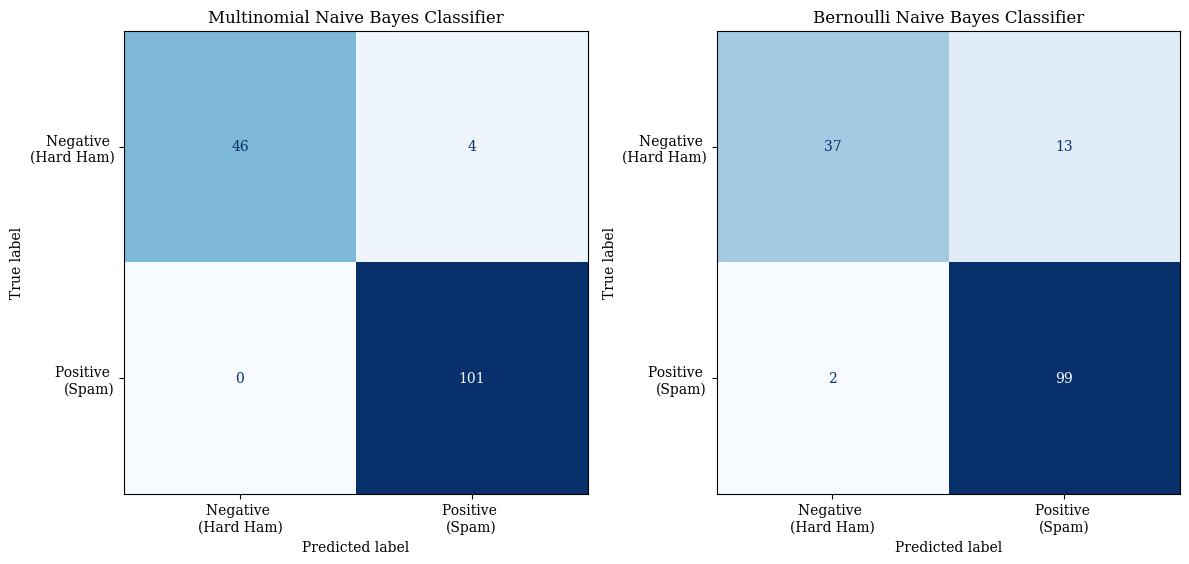

In [44]:
# Create a figure and axes for subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot confusion matrix for Multinomial Naive Bayes Classifier
multinomial_cf_hh = ConfusionMatrixDisplay(multinomial_conf_matrix_hh, display_labels=('Negative \n(Hard Ham)','Positive \n(Spam)')).plot(ax=axes[0], cmap="Blues", colorbar=False)
axes[0].set_title("Multinomial Naive Bayes Classifier")

# Plot confusion matrix for Bernoulli Naive Bayes Classifier
bernoulli_cf_hh = ConfusionMatrixDisplay(bernoulli_conf_matrix_hh, display_labels=('Negative \n(Hard Ham)','Positive \n(Spam)')).plot(ax=axes[1], cmap="Blues", colorbar=False)
axes[1].set_title("Bernoulli Naive Bayes Classifier")

# Adjust layout
plt.tight_layout()

# Save the plot as PDF
plt.savefig("confusion_matrices_hh.pdf")
plt.show()
